In [1]:
import fitsio

import pylab             as pl
import numpy             as np

import matplotlib        as mpl
import matplotlib.pylab  as plt
import astropy.io.fits   as fits

from   matplotlib.pyplot import figure
from   astropy.table     import Table, vstack

In [2]:
# hdr  = fits.open('/project/projectdirs/desi/target/catalogs/dr9/0.49.0/randoms/resolve/randoms-1-3.fits')[1].header 
# hdr

In [3]:
rands = []

for ii in np.arange(15):
    rand = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/v0.1/BGS_BRIGHTAlltiles_8_full.ran.fits')
    
    rands.append(rand)

nrandf = len(rands)
    
rands = vstack(rands)
rands

LOCATION,FIBER,TARGETID,RA,DEC,TILEID,ZWARN,FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,TILELOCID,NTILE,TILES,TILELOCIDS,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,APFLUX_G,APFLUX_R,APFLUX_Z,APFLUX_IVAR_G,APFLUX_IVAR_R,APFLUX_IVAR_Z,MASKBITS,WISEMASK_W1,WISEMASK_W2,EBV,PHOTSYS,HPXPIXEL,rosette_number
int64,int32,int64,float64,float64,int64,int64,int32,float32,float32,int32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,bytes43,bytes135,int16,int32,bytes8,int32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,uint8,uint8,float32,bytes1,int64,int64
1440,522,327858110079172735,212.1726654828246,-2.213858999176909,532,0,0,145.67825,-381.00446,102100,-0.004,0.001,329.2138,0.7422230155300532,0.012891966,6.6185737,103.800354,0.37703168,0.15484843,5.286113,0.006989476,469.0452,0.8593651,7.450601,17.405054,0.0,1005.6463,4.316401,9.283574,22.70406,6.625563,1578.4918,5.552798,16.889023,5321440,1,532,5321440,9010,318256,2121m022,127,3,3,3,1468.5903,653.20154,106.44258,969.49426,422.35315,60.554398,3.156148,0.8491655,1.5549871,1.5580441,1.3689809,-0.0033589373,0.003794812,-0.009939476,67243.69,29564.49,3732.8752,0,0,0,0.059691902,S,25915,17
1395,528,327858110079172743,212.22945981442987,-2.14287284002992,532,0,0,137.10437,-361.0921,102000,0.001,-0.002,329.2138,0.7285334809892414,0.013086323,6.754296,105.515015,0.38317767,0.15764071,5.420089,0.0071150055,481.2664,0.8806911,7.6458187,18.33165,0.0,1053.8057,4.5340877,9.754057,23.764826,6.7614107,1640.587,5.7979565,17.557516,5321395,2,529-532,5291419-5321395,9010,318256,2121m022,135,3,3,2,1455.326,661.9058,61.81126,959.8502,428.235,36.68388,2.9221454,0.88620573,1.553982,1.558887,1.4705592,0.00070738554,-0.002099352,-0.0070164585,66027.24,30188.512,2505.3293,0,0,0,0.05842616,S,25915,17
1442,515,327858110079172783,212.13874071814874,-2.1406283698205977,532,0,0,159.9167,-360.7208,102100,-0.003,-0.0,329.2138,0.7250493309558984,0.013628212,7.094321,109.622696,0.40032744,0.16285975,5.484065,0.007271832,486.65622,0.8906726,7.714434,17.933203,0.0,1025.0463,4.4246182,9.502515,23.430895,7.1015925,1621.3252,5.7156186,17.379808,5321442,2,529-532,5291463-5321442,9010,318256,2121m022,175,1,1,2,452.8856,229.84341,61.867813,318.3252,162.75418,36.682972,3.1257746,0.89180344,1.6538829,1.6974498,1.4723556,0.0034503394,-0.00030832939,-0.014237928,24112.143,13318.067,2530.6655,0,0,0,0.059723023,S,25915,17
1416,510,327858110079172848,212.23929649651288,-2.2124549257477653,532,0,0,134.87805,-384.157,102000,-0.002,0.004,329.2138,0.7518539532647188,0.011317743,5.964634,90.639694,0.33353806,0.13393006,4.6476746,0.0062339627,412.05966,0.7552891,6.5286055,15.436826,0.0,900.34344,3.8471565,8.273834,20.09582,5.970868,1403.0428,4.9359837,14.93637,5321416,1,532,5321416,9010,318256,2121m022,240,3,3,3,1468.5903,653.20154,106.44258,969.49426,422.35315,60.554398,3.2958848,0.9645412,1.5549871,1.5580441,1.3689809,-0.0044644843,-0.007041763,0.026152426,68522.76,30044.086,3722.1548,0,0,0,0.05858564,S,25915,17
1394,503,327858110079172907,212.1968655318662,-2.154741758342564,526,0,0,130.51788,-369.10092,102100,0.005,0.0,313.4244,0.7451273001903959,0.016516749,8.968997,129.75508,0.49080765,0.19070984,5.5857215,0.00785669,509.55792,0.92047894,7.8845816,17.62272,0.0,973.9153,4.2664137,9.177276,23.22496,8.976854,1613.2283,5.6777,17.252567,5261394,2,526-529,5261394-52

In [4]:
one_tile = rands[['426' in x for x in rands['TILES']]]
one_tile

LOCATION,FIBER,TARGETID,RA,DEC,TILEID,ZWARN,FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,TILELOCID,NTILE,TILES,TILELOCIDS,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,APFLUX_G,APFLUX_R,APFLUX_Z,APFLUX_IVAR_G,APFLUX_IVAR_R,APFLUX_IVAR_Z,MASKBITS,WISEMASK_W1,WISEMASK_W2,EBV,PHOTSYS,HPXPIXEL,rosette_number
int64,int32,int64,float64,float64,int64,int64,int32,float32,float32,int32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,bytes43,bytes135,int16,int32,bytes8,int32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,uint8,uint8,float32,bytes1,int64,int64
1443,516,327863814756237591,268.46124780684715,64.6192418283046,417,4,0,170.42838,-351.1017,-1,-0.005,-0.01,285.8591,0.7930729986371428,0.019374097,11.379617,147.0943,0.58935845,0.21243444,6.436895,0.011284481,670.1015,1.1266845,9.240528,23.222788,0.0,1197.8673,5.442774,11.571498,29.679058,11.390902,2015.0632,7.1588173,21.024462,4171443,4,417-419-425-426,4171443-4191314-4251356-4261416,9011,629781,2685p645,279,3,3,2,770.25946,259.23047,66.5375,558.1928,177.16576,33.822964,14.032853,9.6769,1.8376515,1.6330456,1.0938863,0.0005417129,-0.00058424094,0.0033534765,129870.86,34380.36,1526.2657,0,0,0,0.034978837,N,10237,15
1443,516,327863814756238022,268.4387019758132,64.62020415400211,417,4,0,170.42838,-351.1017,-1,-0.005,-0.01,285.8591,0.7930729986371428,0.019374097,11.379617,147.0943,0.58935845,0.21243444,6.436895,0.011284481,670.1015,1.1266845,9.240528,23.222788,0.0,1197.8673,5.442774,11.571498,29.679058,11.390902,2015.0632,7.1588173,21.024462,4171443,4,417-419-425-426,4171443-4191335-4251356-4261416,9011,629781,2685p645,710,3,3,2,770.25946,259.23047,66.5375,558.1928,177.16576,33.822964,11.071146,6.847967,1.8376515,1.6330456,1.0938863,-0.0010365323,-0.008580978,0.005084631,128735.39,33698.44,1507.2966,0,0,0,0.03495363,N,10237,15
1443,516,327863814756239311,268.48255172001257,64.61445146766258,417,4,0,170.42838,-351.1017,-1,-0.005,-0.01,285.8591,0.7930729986371428,0.019374097,11.379617,147.0943,0.58935845,0.21243444,6.436895,0.011284481,670.1015,1.1266845,9.240528,23.222788,0.0,1197.8673,5.442774,11.571498,29.679058,11.390902,2015.0632,7.1588173,21.024462,4171443,4,417-419-425-426,4171443-4191314-4251356-4261416,9011,629781,2685p645,1999,3,3,3,770.25946,259.23047,86.76084,558.1928,177.16576,47.80028,13.163147,9.345231,1.8376515,1.6330456,1.2334075,0.004360339,0.0016717005,-0.013046518,124486.19,34199.73,2361.1484,0,0,0,0.035198376,N,10237,15
1443,516,327863814756239664,268.5020234733493,64.61539340592809,417,4,0,170.42838,-351.1017,-1,-0.005,-0.01,285.8591,0.7930729986371428,0.019374097,11.379617,147.0943,0.58935845,0.21243444,6.436895,0.011284481,670.1015,1.1266845,9.240528,23.222788,0.0,1197.8673,5.442774,11.571498,29.679058,11.390902,2015.0632,7.1588173,21.024462,4171443,4,417-419-425-426,4171443-4191314-4251355-4251356-4261416,9011,629781,2685p645,2352,3,3,3,770.25946,259.23047,86.76084,558.1928,177.16576,47.80028,11.282697,7.9405203,1.8376515,1.6330456,1.2334075,0.00062636356,-0.0020718472,-0.006197844,123348.02,33807.605,2320.5884,0,0,0,0.03534732,N,10237,15
474,372,327863814760431946,269.13827776881067,64.58166221944256,424,0,0,38.43675,-365.0429,101500,-0.0,0.007,524.0326,0.7889999999999998,0.017702736,15.091351,120.52307,0.60373354,0.1459378,6.1398735,0.0089939665,587.10535,1.0287236,8.872849,28.55866,0.0,131

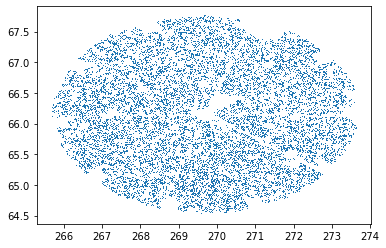

In [5]:
pl.plot(one_tile['RA'], one_tile['DEC'], marker=',', lw=0.0)

In [6]:
len(one_tile) / 2500. / nrandf

5.6708

In [7]:
len(rands) / 2500. / nrandf

170.4444

In [8]:
all_sky_deg2 = 4. * np.pi * (180. / np.pi)**2.
all_sky_deg2

41252.96124941928

In [9]:
fsky = len(rands) / 2500. / nrandf / all_sky_deg2
fsky

0.004131688849425309

In [10]:
cmap = plt.cm.plasma

cmaplist = [cmap(i) for i in range(cmap.N)]

cmaplist[0] = (.5, .5, .5, 1.0)

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 20, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

Text(0.5, 1.0, '$f_{\\rm{sky}}=$0.004')

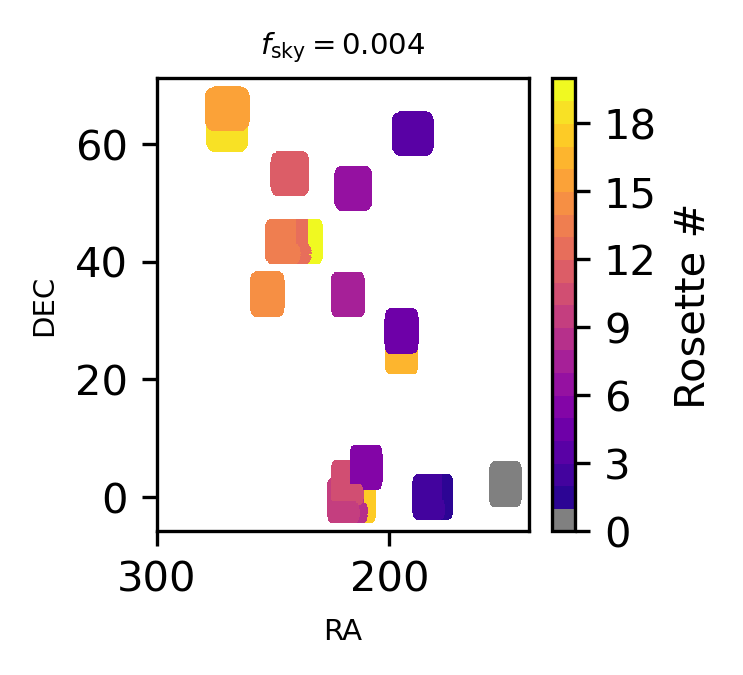

In [22]:
figure(figsize=(2, 2), dpi=300)

pl.scatter(rand['RA'], rand['DEC'], c=rand['rosette_number'], marker=',', lw=0.0, vmin=0, vmax=19, cmap=cmap, norm=norm)
pl.colorbar(label='Rosette #')

pl.xlim(300., 140.)

pl.xlabel('RA', fontsize=7)
pl.ylabel('DEC', fontsize=7)

pl.title(r'$f_{\rm{sky}}=$' + '{:.3f}'.format(fsky), fontsize=7)

# Done.